In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Outputs are assumed to be located in iteratively-code-examples project folder
path = os.path.abspath(os.path.join(os.getcwd(), "..", "..","..","..","outputs","chicago","plans","trips.csv.gz"))
df = pd.read_csv(path)

# Convert timestamp
df['trip_start_timestamp'] = pd.to_datetime(df['trip_start_timestamp'], format='%Y-%m-%dT%H:%M:%S.000')


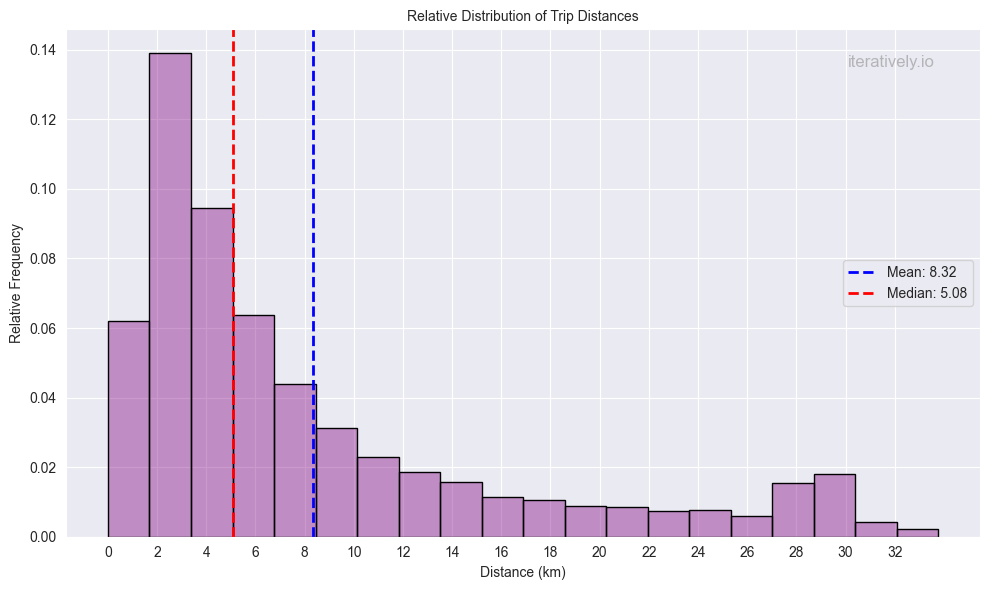

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set style
sns.set_style("darkgrid")

# Convert miles to kilometers
df['distance_km'] = df['distance_miles'] * 1.60934

# Filter out the top 1% of distances
distanceFilter = df['distance_km'].quantile(0.99)
filtered_df = df[df['distance_km'] <= distanceFilter]

# Create histogram with seaborn
plt.figure(figsize=(10, 6))
sns.histplot(
    data=filtered_df,
    x='distance_km',
    bins=20,
    stat='density',
    kde=False,
    color='purple',  # viridis not directly supported, but can be customized
    edgecolor='black',
    alpha=0.4
)

# Set titles and labels
plt.title('Relative Distribution of Trip Distances', fontsize=10)
plt.xlabel('Distance (km)', fontsize=10)
plt.ylabel('Relative Frequency', fontsize=10)

# Set x-ticks
range_max = filtered_df['distance_km'].max()
xticks = np.arange(0, range_max, 2)
plt.xticks(xticks, [f"{tick:.0f}" for tick in xticks])

# Add branding text
plt.text(0.95, 0.95, 'iteratively.io', fontsize=12, color='gray',
         ha='right', va='top', alpha=0.5, transform=plt.gca().transAxes)

# Add mean and median lines
mean_distance = filtered_df['distance_km'].mean()
median_distance = filtered_df['distance_km'].median()
plt.axvline(mean_distance, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean_distance:.2f}')
plt.axvline(median_distance, color='red', linestyle='--', linewidth=2, label=f'Median: {median_distance:.2f}')
plt.legend()

# Save the plot
plt.tight_layout()
plt.savefig("relative_trip_distribution_km.png")


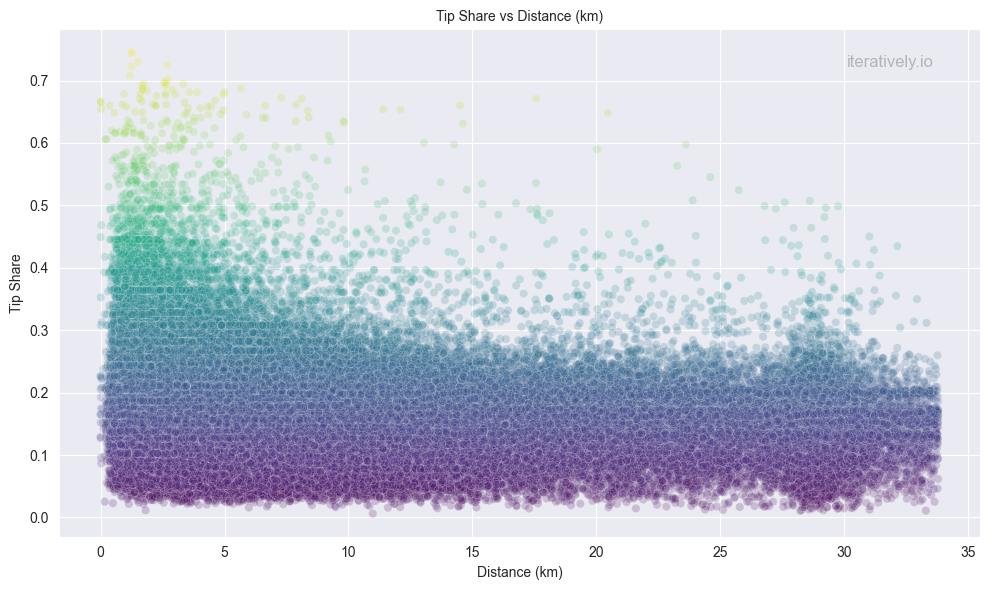

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Stil setzen
sns.set_style("darkgrid")

df['distance_km'] = df['distance_miles'] * 1.60934

# Daten filtern
distanceFilter = df['distance_km'].quantile(0.99)
tip_df = df[(df['distance_km'] <= distanceFilter) & (df['tip_share'] > 0) & (df['tip_share'] < 1)]

plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(
    data=tip_df,
    x='distance_km',
    y='tip_share',
    hue='tip_share',
    palette='viridis',
    alpha=0.2,
    legend=False
)


plt.title('Tip Share vs Distance (km)', fontsize=10)
plt.xlabel('Distance (km)', fontsize=10)
plt.ylabel('Tip Share', fontsize=10)

plt.text(0.95, 0.95, 'iteratively.io', fontsize=12, color='gray',
         ha='right', va='top', alpha=0.5, transform=plt.gca().transAxes)

plt.tight_layout()
plt.savefig("tip_share_vs_distance_km.png")


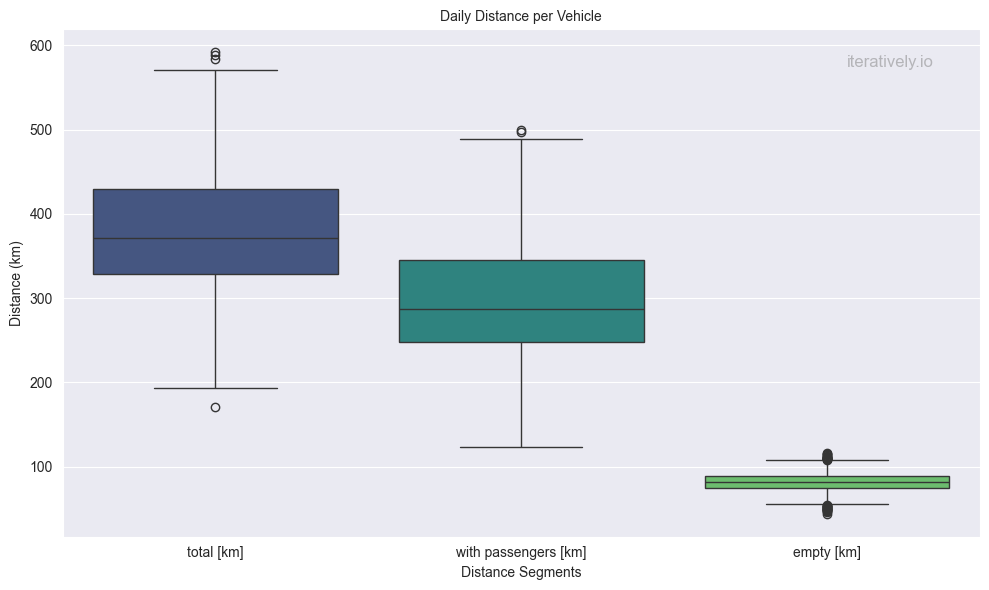

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
vehicles_distance_stats_path = os.path.abspath(os.path.join(os.getcwd(), "..", "..","..","..","outputs","chicago","output","0d95c633-2c12-4b99-bdf9-22b005e281c2","output_vehicleDistanceStats_drt.csv"))
vehicles_distance_stats = pd.read_csv(vehicles_distance_stats_path,sep = ";")

# Select relevant columns and convert meters to kilometers, then divide by 7
distance_columns = ['drivenDistance_m', 'occupiedDistance_m', 'emptyDistance_m']
df_km = vehicles_distance_stats[distance_columns] / 1000 / 7

# Rename columns for plot labels
df_km.columns = ['total [km]', 'with passengers [km]', 'empty [km]']

# Convert to long format for seaborn
df_long = df_km.melt(var_name='Distance Segments', value_name='Distance')

# Create boxplot with seaborn
plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    data=df_long,
    x='Distance Segments',
    y='Distance',
    hue='Distance Segments',
    palette='viridis',
    legend=False
)


# Set titles and labels
ax.set_title('Daily Distance per Vehicle', fontsize=10)
ax.set_ylabel('Distance (km)', fontsize=10)
ax.tick_params(axis='both', labelsize=10)

# Add watermark
ax.text(0.95, 0.95, 'iteratively.io', fontsize=12, color='gray', ha='right', va='top', alpha=0.5, transform=ax.transAxes)

# Save the plot
plt.tight_layout()
plt.savefig("seaborn_boxplot_daily_distance_km.png")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors


fleetPath = os.path.abspath(os.path.join(os.getcwd(), "..", "..","..","..","outputs","chicago","output","0d95c633-2c12-4b99-bdf9-22b005e281c2","ITERS","it.2","2.occupancy_time_profiles_drt.txt"))
fleet = pd.read_csv(fleetPath,sep = ";")
print(fleet)

fleet['minutes'] = pd.to_timedelta(fleet['time']).dt.total_seconds() / 60


categories = ['0 pax', '1 pax', 'STAY', 'RELOCATE']


viridis = sns.color_palette("viridis", n_colors=len(categories))


stack_data = [fleet[cat] for cat in categories]


plt.figure(figsize=(10, 6))
plt.stackplot(fleet['minutes'], stack_data, labels=categories, colors=viridis)
plt.xlabel('Time (minutes since week start)')
plt.ylabel('Occupancy / Activity')
plt.title('Stacked Occupancy Profile Over One Week')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.savefig("occupancy_stackplot_seaborn_viridis.png")
plt.show()


           time  RELOCATE         STAY       0 pax       1 pax
0      00:00:00       0.0  3351.613333  139.670000    8.716667
1      00:05:00       0.0  3189.906667  155.726667  154.366667
2      00:10:00       0.0  3121.793333  111.713333  266.493333
3      00:15:00       0.0  3086.016667  136.870000  277.113333
4      00:20:00       0.0  3071.470000  140.833333  287.696667
...         ...       ...          ...         ...         ...
2012  167:40:00       0.0  2719.770000  187.483333  592.746667
2013  167:45:00       0.0  2917.403333  108.976667  473.620000
2014  167:50:00       0.0  3159.696667   56.973333  283.330000
2015  167:55:00       0.0  3405.913333   37.336667   56.750000
2016  168:00:00       0.0     0.000000    0.000000    0.000000

[2017 rows x 5 columns]
